# EDA & Feature Engineering

## Imports

In [382]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Callable
from pandas import DataFrame, Series


sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

warnings.filterwarnings('ignore')

## Data Overview

In [383]:
CATEGORY = "category"
STATE = "state"
PRICE = "price"
LIVING_SPACE = "living_space"
ROOMS = "rooms"
RATING_LOCATION = "rating_location"
RATING_PUBLIC_TRANSPORT = "rating_public_transport"
HOUSE_CATEGORY = "house_category"
HOUSE_YEAR = "house_build_year"
HOUSING_SITUATION = "housing_situation"
IS_BALCONY = "is_balcony"
IS_BATH = "is_bath"
PARKING = "parking_space"
IS_ELEVATOR = "is_elevator"
IS_GUEST_WC = "is_guest_wc"
IS_GARDEN = "is_garden"
IS_TERRACE = "is_terrace"
IS_WINTER_GARDEN = "is_wintergarden"
IS_BATH_WITH_WINDOW = "is_bath_with_window"
IS_NEED_RENOVATION = "is_need_renovation"
IS_NEW_BUILDING = "is_new_building"
ENERGY_HEATING_TYPE = "energy_heating_type"
ENERGY_SOURCE = "energy_source"
ENERGY_CERTIFICATE_TYPE = "energy_certificate_type"
ENERGY_BUILDING_TYPE = "energy_building_type"
ENERGY_ESSENTIAL_TYPE = "energy_essential_type"
ENERGY_EFFICIENT_CLASS = "energy_efficient_class"

In [384]:
df = pd.read_csv("./data/cleaned_property_data.csv", sep="|").drop_duplicates()
df.head()

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
0,https://www.immowelt.de/expose/28xsk53,Apartment,bl-baden-wuerttemberg,320000.0,87.00,3.5,Public publisher,Gut,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h
1,https://www.immowelt.de/expose/27egy5v,Apartment,bl-baden-wuerttemberg,449500.0,79.00,2.5,Public publisher,Gut,Super,Not given,...,False,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN
2,https://www.immowelt.de/expose/27dc45u,Apartment,bl-baden-wuerttemberg,465000.0,53.99,2.0,Public publisher,Gut,Gut,terrassenwohnung,...,False,True,False,False,False,True,tiefgarage,gas,NaN,NaN
3,https://www.immowelt.de/expose/28b5m5a,Apartment,bl-baden-wuerttemberg,179000.0,58.35,2.0,Public publisher,Gut,Gut,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN
4,https://www.immowelt.de/expose/2zpe54x,Apartment,bl-baden-wuerttemberg,385000.0,NaN,4.0,Public publisher,Okay,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 620
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      594 non-null    object 
 1   category                 594 non-null    object 
 2   state                    594 non-null    object 
 3   price                    594 non-null    float64
 4   living_space             592 non-null    float64
 5   rooms                    594 non-null    float64
 6   publisher                594 non-null    object 
 7   rating_location          594 non-null    object 
 8   rating_public_transport  594 non-null    object 
 9   house_category           595 non-null    object 
 10  housing_situation        595 non-null    object 
 11  house_build_year         262 non-null    float64
 12  is_balcony               594 non-null    object 
 13  is_bath                  594 non-null    object 
 14  is_elevator              5

In [386]:
df.describe()

,price,living_space,rooms,house_build_year
count,5.940000e+02,592.000000,594.000000,262.000000
mean,5.381570e+05,128.544414,4.629630,1961.683206
std,8.158131e+05,93.985204,4.246319,55.135733
min,2.990000e+04,2.173000,1.000000,1579.000000
25%,1.990000e+05,71.000000,3.000000,1935.250000
50%,3.600000e+05,109.000000,4.000000,1970.500000
75%,5.880000e+05,150.000000,5.000000,1999.000000
max,1.090000e+07,844.000000,60.000000,2024.000000


In [387]:
df.describe(include=["O"]).T

,count,unique,top,freq
url,594,594,https://www.immowelt.de/expose/28xsk53,1
category,594,2,Apartment,318
state,594,16,bl-berlin,40
publisher,594,2,Public publisher,561
rating_location,594,5,Gut,285
rating_public_transport,594,5,Gut,163
house_category,595,15,Not given,272
housing_situation,595,3,Other,491
is_balcony,594,2,False,383
is_bath,594,2,False,356


In [388]:
to_float_cols = [
    IS_BALCONY,
    IS_BATH,
    IS_ELEVATOR,
    IS_GUEST_WC,
    IS_GARDEN,
    IS_TERRACE,
    IS_WINTER_GARDEN,
    IS_BATH_WITH_WINDOW,
    IS_NEED_RENOVATION,
    IS_NEW_BUILDING,
]

for col in to_float_cols:
    df[col] = df[col].astype(bool)

df.describe(include=["O"]).T

,count,unique,top,freq
url,594,594,https://www.immowelt.de/expose/28xsk53,1
category,594,2,Apartment,318
state,594,16,bl-berlin,40
publisher,594,2,Public publisher,561
rating_location,594,5,Gut,285
rating_public_transport,594,5,Gut,163
house_category,595,15,Not given,272
housing_situation,595,3,Other,491
parking_space,595,8,Keine Parkmöglichkeit,490
energy_source,595,4,gas,304


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 620
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      594 non-null    object 
 1   category                 594 non-null    object 
 2   state                    594 non-null    object 
 3   price                    594 non-null    float64
 4   living_space             592 non-null    float64
 5   rooms                    594 non-null    float64
 6   publisher                594 non-null    object 
 7   rating_location          594 non-null    object 
 8   rating_public_transport  594 non-null    object 
 9   house_category           595 non-null    object 
 10  housing_situation        595 non-null    object 
 11  house_build_year         262 non-null    float64
 12  is_balcony               595 non-null    bool   
 13  is_bath                  595 non-null    bool   
 14  is_elevator              5

## Helper Functions

In [390]:
MEAN = np.mean
MEDIAN = np.median

def plot_target_relation(x: str, title: str, aggfunc: Callable = np.mean, rotate: float = 0.0):
    ax = sns.pointplot(x=x, y=PRICE, data=df, estimator=aggfunc)
    ax.set(title=title);
    ax.tick_params(axis='x', rotation=rotate)
    return df.pivot_table(index=x, values=PRICE, aggfunc=aggfunc)

def describe_histplot(x: str, title: str):
    sns.histplot(x=x, data=df).set(title=title)
    print(f"Skew:\t{df[x].skew()}")
    print(f"median:\t{df[x].median()}")
    return df[x].describe()

def countplot_rotate(x: str, rotate: float = 0):
    # TODO: Add title!
    ax = sns.countplot(x=x, data=df)
    ax.set(title=f"Distribution of {x} records")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotate)


## Target

Skew:	6.998055479058362
median:	360000.0


count    5.940000e+02
mean     5.381570e+05
std      8.158131e+05
min      2.990000e+04
25%      1.990000e+05
50%      3.600000e+05
75%      5.880000e+05
max      1.090000e+07
Name: price, dtype: float64

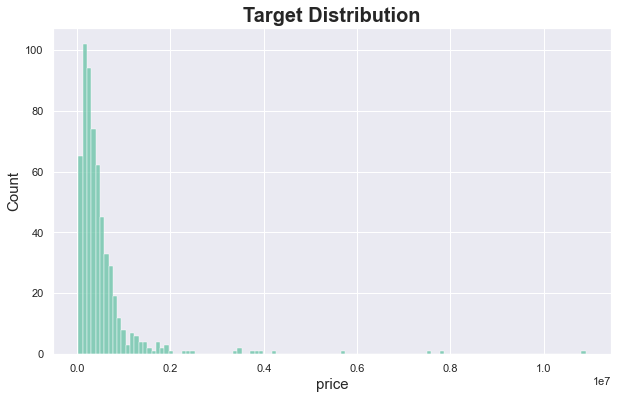

In [391]:
describe_histplot(x=PRICE, title="Target Distribution")

## Category

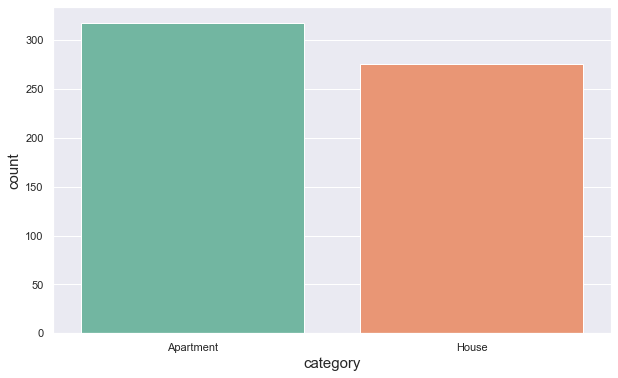

In [392]:
sns.countplot(x=CATEGORY, data=df);

In [393]:
df[CATEGORY]

0      Apartment
1      Apartment
2      Apartment
3      Apartment
4      Apartment
         ...    
616        House
617        House
618        House
619        House
620        House
Name: category, Length: 595, dtype: object

,price
category,
Apartment,368180.155660
House,733999.985507


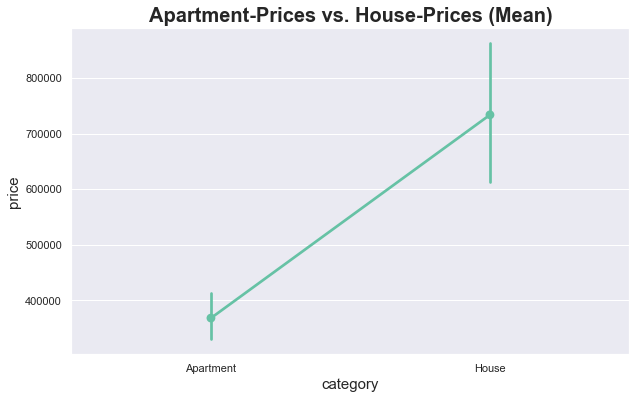

In [394]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (Mean)", aggfunc=MEAN)

,price
category,
Apartment,259750.0
House,472000.0


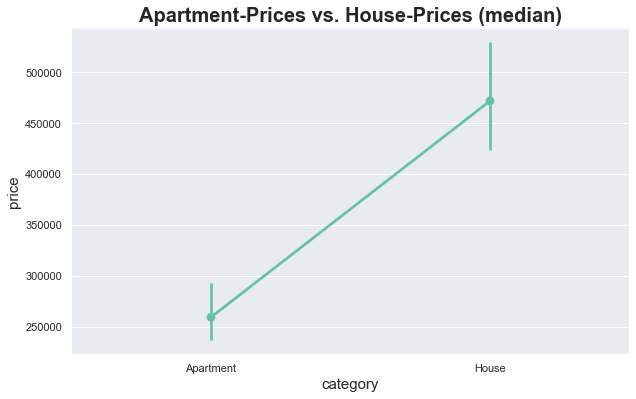

In [395]:
plot_target_relation(x=CATEGORY, title="Apartment-Prices vs. House-Prices (median)", aggfunc=MEDIAN)

- => Category has a strong impact on the target
- => OneHotEncoding

## State

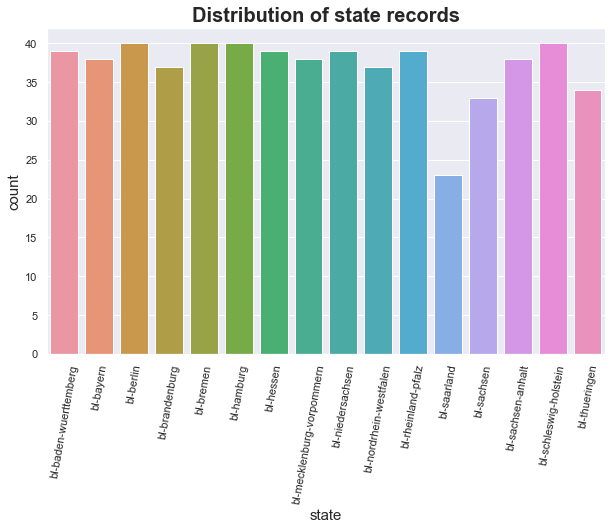

In [396]:
countplot_rotate(x=STATE, rotate=80)

,price
state,
bl-baden-wuerttemberg,5.216046e+05
bl-bayern,6.528350e+05
bl-berlin,1.213122e+06
bl-brandenburg,4.463956e+05
bl-bremen,4.288912e+05
bl-hamburg,1.440186e+06
bl-hessen,5.971667e+05
bl-mecklenburg-vorpommern,4.176571e+05
bl-niedersachsen,3.551974e+05


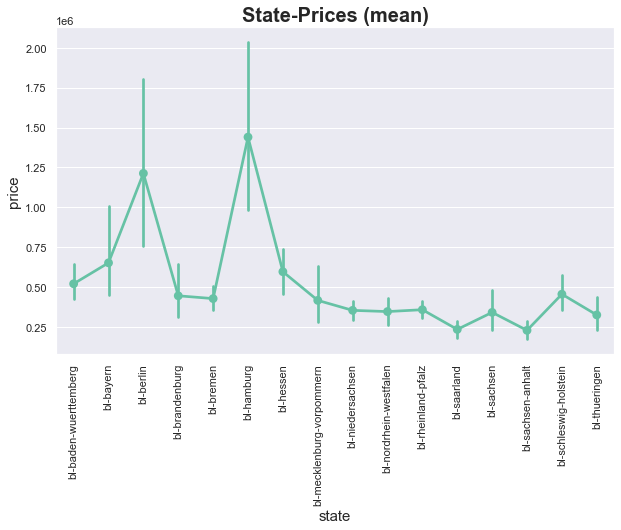

In [397]:
plot_target_relation(x=STATE, title="State-Prices (mean)", aggfunc=MEAN, rotate=90)

- => the state has a significant impact on the target.
- => OneHotEncoding

## Living Space

In [398]:
df[LIVING_SPACE].isna().sum()

3

Skew:	3.0246364706465387
median:	109.0


count    592.000000
mean     128.544414
std       93.985204
min        2.173000
25%       71.000000
50%      109.000000
75%      150.000000
max      844.000000
Name: living_space, dtype: float64

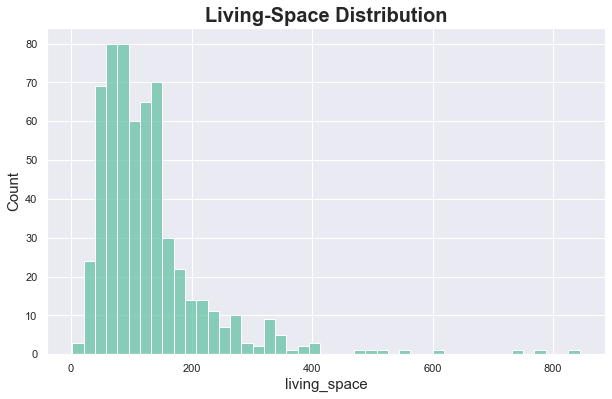

In [399]:
describe_histplot(x=LIVING_SPACE, title="Living-Space Distribution")

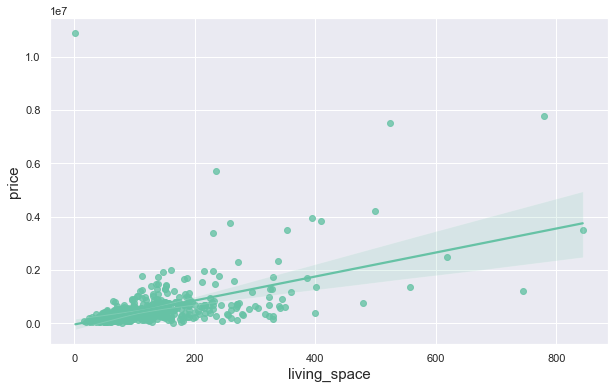

In [400]:
sns.regplot(x=LIVING_SPACE, y=PRICE, data=df);

- => Living-Space has a significant impact on the price
- => High Skew -> Log-transformation
- => Scale

## Rooms

In [401]:
df[ROOMS].isna().sum()

1

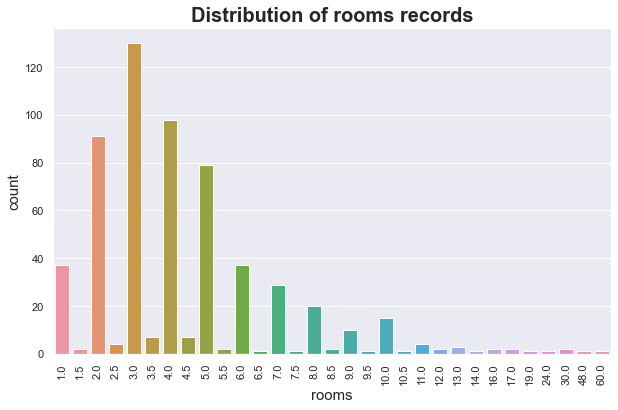

In [402]:
countplot_rotate(x=ROOMS, rotate=90)

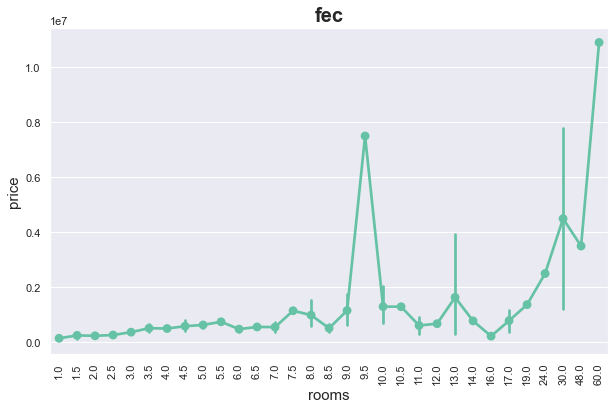

In [403]:
plot_target_relation(x=ROOMS, title="fec", rotate=90);

In [404]:
# TODO: hier tiefer rein
# -> 9.5 raus?
# ab 24 nicht mehr nutzbar?

In [405]:
df[df[ROOMS] == 9.5]

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
113,https://www.immowelt.de/expose/27a225p,House,bl-berlin,7500000.0,524.46,9.5,Public publisher,Mäßig,Super,villa,...,True,True,False,False,False,True,Keine Parkmöglichkeit,gas,bedarfsausweis,d


The 9.5 is an outlier. We remove this

In [406]:
shape_before = df.shape[0]
df = df[df[ROOMS] != 9.5]
shape_after = df.shape[0]
print(f"Removed: {shape_before - shape_after}")

Removed: 1


In [407]:
df[df[ROOMS] > 25]

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
99,https://www.immowelt.de/expose/28zn659,House,bl-berlin,7790000.0,780.000,30.0,Public publisher,Okay,Super,villa,...,False,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN
155,https://www.immowelt.de/expose/27yfd5r,House,bl-brandenburg,3500000.0,844.000,48.0,Public publisher,Gut,Super,mehrfamilienhaus,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,NaN,NaN
227,https://www.immowelt.de/expose/27dea5z,House,bl-hamburg,10900000.0,2.173,60.0,Public publisher,Super,Super,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,bedarfsausweis,d
309,https://www.immowelt.de/expose/27n6y5z,House,bl-mecklenburg-vorpommern,1200000.0,745.000,30.0,Public publisher,Gut,Gut,mehrfamilienhaus,...,True,True,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,e


- 227 has a living space of 2.173, but 60 rooms. Thats not possible or very specific => remove this
- all over 25 rooms are to specific and we have not enough data so that the model can handle this
- => remove all over 25 Rooms!

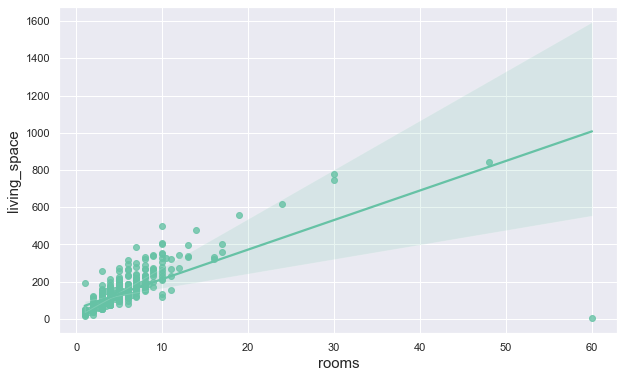

In [408]:
sns.regplot(x=ROOMS, y=LIVING_SPACE, data=df);

In [409]:
df[ROOMS].isna().sum()

1

In [410]:
shape_before = df.shape[0]
df = df[df[ROOMS] <= 25]
shape_after = df.shape[0]
print(f"Removed: {shape_before - shape_after} (incl. nan values)")

Removed: 5 (incl. nan values)


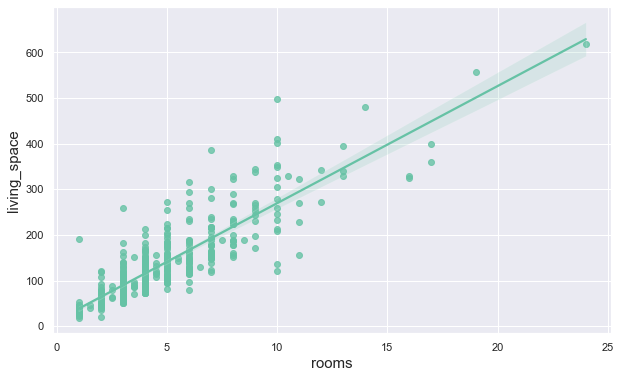

In [411]:
sns.regplot(x=ROOMS, y=LIVING_SPACE, data=df);

- => put together .5 and total
- => Classify in useful Clusters
- => OrdinalEncoding of the Clusters

In [412]:
df.head()

,url,category,state,price,living_space,rooms,publisher,rating_location,rating_public_transport,house_category,...,is_garden,is_terrace,is_wintergarden,is_bath_with_window,is_need_renovation,is_new_building,parking_space,energy_source,energy_certificate_type,energy_efficient_class
0,https://www.immowelt.de/expose/28xsk53,Apartment,bl-baden-wuerttemberg,320000.0,87.00,3.5,Public publisher,Gut,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,h
1,https://www.immowelt.de/expose/27egy5v,Apartment,bl-baden-wuerttemberg,449500.0,79.00,2.5,Public publisher,Gut,Super,Not given,...,False,False,False,True,True,False,Keine Parkmöglichkeit,gas,verbrauchsausweis,NaN
2,https://www.immowelt.de/expose/27dc45u,Apartment,bl-baden-wuerttemberg,465000.0,53.99,2.0,Public publisher,Gut,Gut,terrassenwohnung,...,False,True,False,False,False,True,tiefgarage,gas,NaN,NaN
3,https://www.immowelt.de/expose/28b5m5a,Apartment,bl-baden-wuerttemberg,179000.0,58.35,2.0,Public publisher,Gut,Gut,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,öl,verbrauchsausweis,NaN
4,https://www.immowelt.de/expose/2zpe54x,Apartment,bl-baden-wuerttemberg,385000.0,NaN,4.0,Public publisher,Okay,Okay,Not given,...,False,False,False,False,False,False,Keine Parkmöglichkeit,other,NaN,NaN


In [413]:
# korrelation matrix

In [414]:
# TODOS

# --AFTER EDA
# PUBLISHER => interpolate NAN, wenn signifikant für TARGET
# RATING_LOCATION => interpolate NAN, wenn signifikant für TARGET
# RATING_PUBLIC_TRANSPORT => interpolate NAN, wenn signifikant für TARGET
# HOUSE_YEAR => NAN to 0 and convert to int, wenn signifikant für TARGET
# ENERGY_CERTIFICATE_TYPE => interpolate NAN, wenn signifikant für TARGET
# ENERGY_EFFICIENT_CLASS => interpolate NAN, wenn signifikant für TARGET

# interpolate Livingspace! -> own model?
